In [1]:
save_name = 'ResNet34_Consolidation'

In [2]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks\ModelRuns
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [3]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [4]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [5]:
training_columns = ['Consolidation']
out_channels=len(training_columns)
net_kwargs = {'layers':34, 'drop_out_precent':.5, 'out_channels':out_channels} #18, 34, 50, 101, 152
net = ResNet_GrayScale(**net_kwargs) 

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

          Linear-125                 [-1, 1000]         513,000
          ResNet-126                 [-1, 1000]               0
          Linear-127                    [-1, 1]           1,001
ResNet_GrayScale-128                    [-1, 1]               0
Total params: 21,792,401
Trainable params: 21,792,401
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.39
Forward/backward pass size (MB): 196.51
Params size (MB): 83.13
Estimated Total Size (MB): 280.03
----------------------------------------------------------------


In [6]:
standardTraining = StandardTraining(number_images=0, 
                                     batch_size=64, 
                                     learning_rate=1e-5, 
                                     num_epochs=1,
                                     device=device, 
                                     net=net,
                                     target_columns=training_columns,
                                     save_path= f'notebooks/ModelRuns/saved/{save_name}/',
                                     net_name = 'ResNet_GrayScale',
                                     net_kwargs = net_kwargs)

Number of Training Images: 105,253
Number of Validation Images: 26,495


In [7]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/1]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 379.3863         
Time of Completion: 2020-08-03 22:36:43.913602          
Training Duration: 0:17:27.781509          
Validation Duration: 0:02:13.253013

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Consolidation,6356,174,0.998362,0.939626,0.968104,0.577671,0.076131



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Consolidation,1567,0,1.0,0.940857,0.969527,0.636682,0.092517


Training Duration: 0:19:41.183102



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.938187
Hamming Loss,0.061813
Hamming Accuracy,0.938187
Combined Recall,0.998362
Combined Precision,0.939626
Combined F1,0.968104


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Consolidation,6356,174,0.998362,0.939626,0.968104,0.577671,0.076131


***** ROC *****


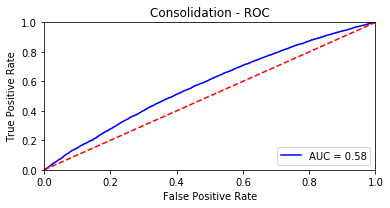

***** Precision / Recall *****


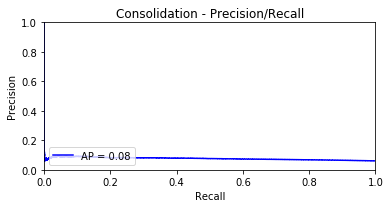


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.940857
Hamming Loss,0.059143
Hamming Accuracy,0.940857
Combined Recall,1.000000
Combined Precision,0.940857
Combined F1,0.969527


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Consolidation,1567,0,1.0,0.940857,0.969527,0.636682,0.092517


***** ROC *****


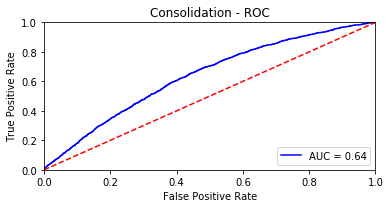

***** Precision / Recall *****


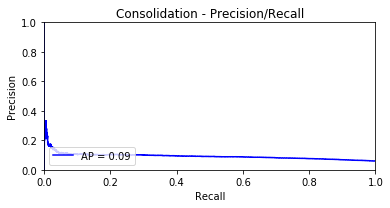

In [8]:
standardTraining.displayMetrics()


ACCURACY

▔▔▔▔


C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


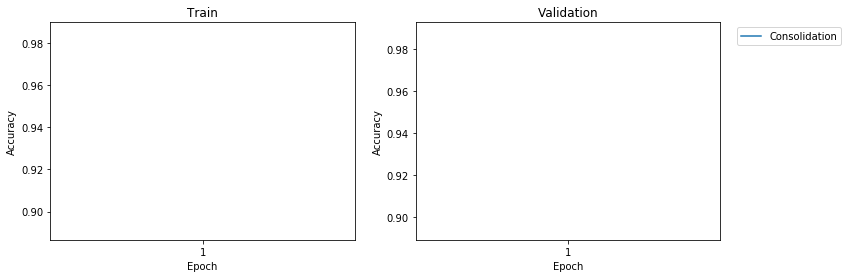


RECALL

▔▔▔


C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


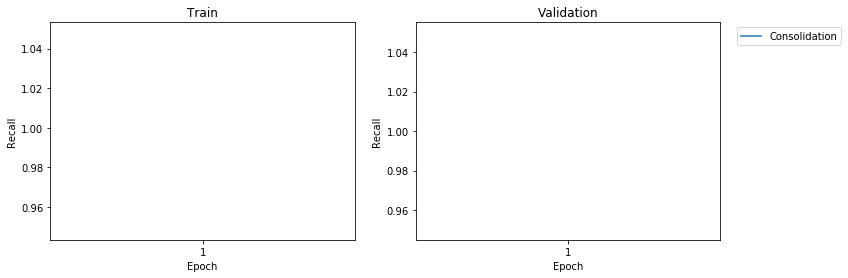


PRECISION

▔▔▔▔▔▔


C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


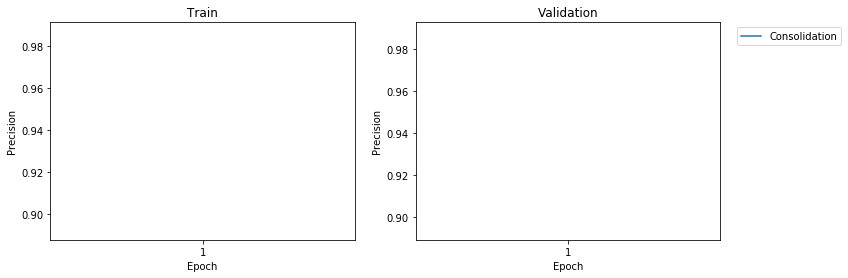


F1

▔


C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


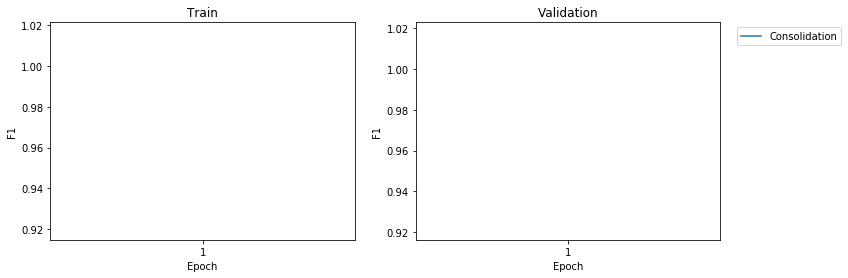


ROC AUC

▔▔▔▔


C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


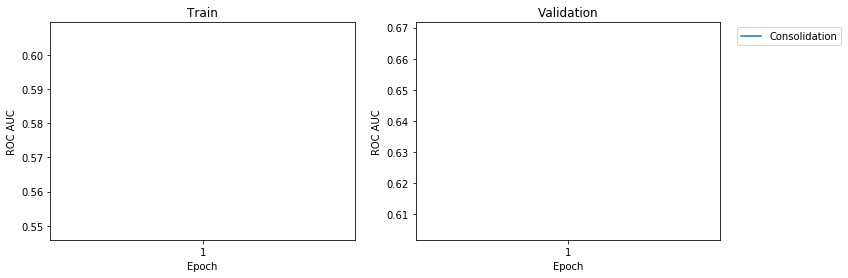


AVERAGE PRECISION

▔▔▔▔▔▔▔▔


C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


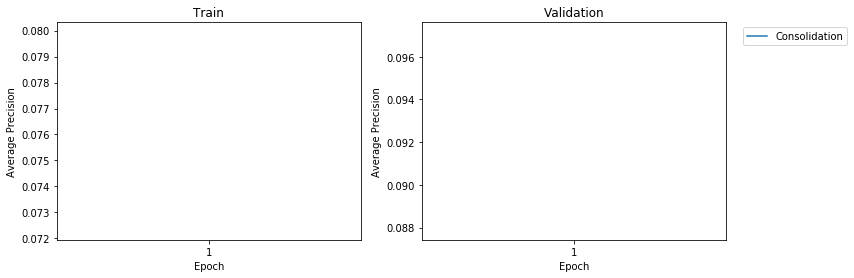

In [9]:
standardTraining.displayEpochProgression()

In [10]:
standardTraining.save()